<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

# 1. Introduction

Company Introduction
Your client for this project is a Telecom company.

They are a leading telecom company with 5 million users.
They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
They want to automate the process of keeping track of male and female users using their voice.
Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.


# 2. Problem Statement

The current process suffers from the following problems:

The current process is a manual classification of gender using their voice.
This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

The company has hired you as a data science consultant.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.

Your Role
You are given a dataset consisting of recorded voice samples, collected from male and female speakers.
Your task is to build a classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.




---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [2]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# 4. Data acquisition and description

Dataset Feature Description
TThe following acoustic properties of each voice are measured and included in the dataset:

Column Name	Description
Id              Unique Id
meanfreq	    Mean frequency (in kHz) for the voice sample
sd	            Standard deviation of the frequency
median	        Median frequency (in kHz) for the voice sample
Q25	            First quantile (in kHz)
Q75	            Third quantile (in kHz)
IQR	            Interquartile range (in kHz)
skew	        Skewness of the voice sample
kurt	        Kurtosis of the voice sample
sp.ent	        Spectral entropy
sfm	            Spectral flatness of the voice sample
mode	        Mode frequency
centroid	    Frequency centroid
peakf	        Peak frequency (the frequency with the highest energy)
meanfun	        Average of fundamental frequency measured across the acoustic signal
minfun	        Minimum fundamental frequency measured across the acoustic signal
maxfun	        Maximum fundamental frequency measured across the acoustic signal
meandom	        Average of dominant frequency measured across the acoustic signal
mindom	        Minimum of dominant frequency measured across the acoustic signal
maxdom	        Maximum of dominant frequency measured across the acoustic signal
dfrange	        Range of dominant frequency measured across the acoustic signal
modindx	        Modulation index. Calculated as the accumulated absolute difference between adjacent Measurements of fundamental frequencies divided by the frequency range
label	        The label for the voice sample (male or female)

In [3]:
#readind current directory and setting path
import os
os.getcwd()
os.chdir("D:\DATA\D Drive\Documents\Six sigma\Insaid\ML Inter\Gender recognition")
os.getcwd()

# Load the data
df_train=pd.read_csv("voice_train.csv")
df_test=pd.read_csv("voice_test.csv")
print(df_train.shape, df_test.shape)



(2851, 22) (317, 21)


In [4]:
'''
Observation:

Train Set:
The train set contains 2851 rows and 22 columns.
The last column label is the target variable.

Test Set:
The test set contains 317 rows and 21 columns.
The test set doesn’t contain the label column.
It needs to be predicted for the test set.

'''

'\nObservation:\n\nTrain Set:\nThe train set contains 2851 rows and 22 columns.\nThe last column label is the target variable.\n\nTest Set:\nThe test set contains 317 rows and 21 columns.\nThe test set doesn’t contain the label column.\nIt needs to be predicted for the test set.\n\n'

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
df_train.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,0.408473,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,0.176880,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,0.259191,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,0.396548,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,0.533495,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
'''
observation:
No missing data in the numeric features
Looking at mean and std, some features have more variation. For eg, skew and kurt. Std is higher than mean. 
Features like maxdom, dfrange std is higher. 
On the shape and other details, we will see more in pre-profiling

'''

'\nobservation:\nNo missing data in the numeric features\nLooking at mean and std, some features have more variation. For eg, skew and kurt. Std is higher than mean. \nFeatures like maxdom, dfrange std is higher. \nOn the shape and other details, we will see more in pre-profiling\n\n'

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [8]:
'''
observation:
No missing data
Of the total 21 features, 20 are float, 1 int and 1 object. Label is the Target variable.
Totally, 22 columns and 2851 rows of data
No need for any imputation as all data is available
'''

'\nobservation:\nNo missing data\nOf the total 21 features, 20 are float, 1 int and 1 object. Label is the Target variable.\nTotally, 22 columns and 2851 rows of data\nNo need for any imputation as all data is available\n'

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [9]:
profile = ProfileReport(df=df_train)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


In [10]:
'''
Observations:
From the overall summary, no missing value and no duplicates
21 Numeric and 1 categorical feature
meanfreq-    shows normal distribution with a mean of 0.180.shows high correlation with many fields(sd, mean,Q25,Q75 etc)
sd      -    shows double peak(0.03 and 0.06). High correlation with meanfreq,median,Q25 etc
median  -    shows a left skew distribution with a mean of 0.185. High correlation with meanfreq,sd,Q25 etc
Q25     -    CLose to normal distribution with some local peaks. Mean of 0.140 and high correlation with sd, meanfreq,median
Q75     -    Left skewed and multiple peak in the distribution.mean of 0.224 and high correlation with meanfreq, median, mode, centroid
IQR     -    shows double peak in distribution with a mean of 0.084. high correlation with meanfreq, sd, Q25
skew    -    very closel values of the distribution with a mean of 3.11. High correlation with kurt
kurt    -    Huge variation in data ranging from 2.06 to 1309 and a mean of 35.8. High correlation with skew
sp.ent  -    Left skewed with a mean of 0.895. High correlation with meanfreq,sd,median etc
sfm     -    Right skewed distribution with multiple peaks. Mean of 0.4 and high correlation with meanfreq,sd,median etc
mode    -    Strange distribution with 205 "Zero" values. High correlation with meanfreq, median,Q25,Q75
centroid-    normally distributed with a little right skew. mean of 0.180 and high correlation with meanfreq,sd,median,Q25,Q75
meanfun -    Bi-modal distribution with a mean of 0.142. High correlation with Q25, IQR
minfun  -    Bi-modal and many values are less than 0.05. Mean of 0.036 and high correlation with meandom. Only 30% distinct values
maxfun  -    Distinct value is 4.1% and looks like a uniform distribution with a gradual right skew. No correlation with any other feature
meandom -    Values from 0 to 3 and tapering down towards 3 with a mean of 0.83. High correlation with meanfreq,centroid,maxdom
mindom  -    Only 2.7% distinct values. Looks like grouped data with a mean of 0.052. High correlation with Q25, mode
maxdom  -    35.5% distinct values and multi-model with a gradual right skew. Mean of 5.07 and max of 21.86. High correlation with sd, centroid, dfrange
dfrange -    36% distinct values and multi-model with a right skew. Mean of 5.02mm and max of 21.84. High correlation with maxdom and has 54 zero values
modindx -    Clear right skewed distribution with a mean of 0.17 and max of 0.93. high correlation with maxdom,dfrange and has 54 zero values
label   -    Categorical with 2 category- female and male. both equal values.



'''

'\nObservations:\nFrom the overall summary, no missing value and no duplicates\n21 Numeric and 1 categorical feature\nmeanfreq-    shows normal distribution with a mean of 0.180.shows high correlation with many fields(sd, mean,Q25,Q75 etc)\nsd      -    shows double peak(0.03 and 0.06). High correlation with meanfreq,median,Q25 etc\nmedian  -    shows a left skew distribution with a mean of 0.185. High correlation with meanfreq,sd,Q25 etc\nQ25     -    CLose to normal distribution with some local peaks. Mean of 0.140 and high correlation with sd, meanfreq,median\nQ75     -    Left skewed and multiple peak in the distribution.mean of 0.224 and high correlation with meanfreq, median, mode, centroid\nIQR     -    shows double peak in distribution with a mean of 0.084. high correlation with meanfreq, sd, Q25\nskew    -    very closel values of the distribution with a mean of 3.11. High correlation with kurt\nkurt    -    Huge variation in data ranging from 2.06 to 1309 and a mean of 35.8. 

# 5.2 Data cleaning

In [11]:
'''
Observation: Three features have zero values. Let us try to replace that with mean or median based on the distriution
'''
#feature mode has 205 "zero" values. median imputation planned as distribution is not normal
df_train['mode']=df_train['mode'].replace(0, df_train['mode'].median())
#dfrange features looks normally distributed. Will replace zeroes with mean
df_train['dfrange']=df_train['dfrange'].replace(0, df_train['dfrange'].mean())
#modindx has skewed distribution. better to replace zeroes with median
df_train['modindx']=df_train['modindx'].replace(0, df_train['modindx'].median())



# 5.3 Post profiling

In [12]:
profile = ProfileReport(df=df_train)
profile.to_file(output_file='Post Profiling Report.html')
print('Accomplished!')


Accomplished!


In [13]:
'''
Observation:
Verified the changes in post profiling and no big change in the distribution of data.
Lets see some more insights in the EDA as we completed data cleaning
'''

'\nObservation:\nVerified the changes in post profiling and no big change in the distribution of data.\nLets see some more insights in the EDA as we completed data cleaning\n'

# 6. Exploratory Data Analysis

In [14]:
# Correlation within features
df_train.corr()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
Id,1.000000,0.423441,-0.525021,0.343340,0.555125,0.049947,-0.604299,-0.108434,-0.151616,-0.504004,-0.432672,0.239050,0.423441,0.773210,0.294314,0.248827,0.324576,0.164870,0.296024,0.278608,-0.054626
meanfreq,0.423441,1.000000,-0.741923,0.924077,0.910995,0.742288,-0.628384,-0.319367,-0.313939,-0.604421,-0.787154,0.606975,1.000000,0.448524,0.378820,0.280244,0.535998,0.220328,0.521057,0.482709,-0.270395
sd,-0.525021,-0.741923,1.000000,-0.562995,-0.848960,-0.167634,0.873957,0.310967,0.343378,0.715366,0.837660,-0.376328,-0.741923,-0.454038,-0.339304,-0.136742,-0.486732,-0.349011,-0.488449,-0.434541,0.183210
median,0.343340,0.924077,-0.562995,1.000000,0.772545,0.732938,-0.475962,-0.257094,-0.244301,-0.502036,-0.661471,0.640830,0.924077,0.404615,0.330022,0.257550,0.453497,0.180631,0.437742,0.412693,-0.253218
Q25,0.555125,0.910995,-0.848960,0.772545,1.000000,0.477469,-0.875383,-0.312586,-0.344764,-0.650356,-0.767701,0.492403,0.910995,0.531689,0.312754,0.202017,0.466120,0.296501,0.460777,0.408281,-0.202033
Q75,0.049947,0.742288,-0.167634,0.732938,0.477469,1.000000,0.006798,-0.208412,-0.149539,-0.182133,-0.386301,0.507549,0.742288,0.149706,0.262243,0.290610,0.359507,-0.028663,0.337006,0.329459,-0.241925
IQR,-0.604299,-0.628384,0.873957,-0.475962,-0.875383,0.006798,1.000000,0.241082,0.310095,0.639951,0.661167,-0.281144,-0.628384,-0.522739,-0.211655,-0.070020,-0.332685,-0.353214,-0.338984,-0.283391,0.096824
skew,-0.108434,-0.319367,0.310967,-0.257094,-0.312586,-0.208412,0.241082,1.000000,0.976422,-0.195626,0.078386,-0.083382,-0.319367,-0.163111,-0.217216,-0.095604,-0.336715,-0.057414,-0.305442,-0.154828,-0.038524
kurt,-0.151616,-0.313939,0.343378,-0.244301,-0.344764,-0.149539,0.310095,0.976422,1.000000,-0.124912,0.109282,-0.048373,-0.313939,-0.192141,-0.203453,-0.060314,-0.302926,-0.100471,-0.274293,-0.118219,-0.073849
sp.ent,-0.504004,-0.604421,0.715366,-0.502036,-0.650356,-0.182133,0.639951,-0.195626,-0.124912,1.000000,0.865949,-0.366877,-0.604421,-0.507143,-0.302332,-0.124272,-0.298051,-0.282068,-0.331158,-0.367646,0.182206


In [15]:
'''
observation:
It is interesting to see lot of medium to high correlation between features.
For eg, median has high correlation with meanfreq, Q25 and Q75
It is better to visualise with a heat map.

'''

'\nobservation:\nIt is interesting to see lot of medium to high correlation between features.\nFor eg, median has high correlation with meanfreq, Q25 and Q75\nIt is better to visualise with a heat map.\n\n'

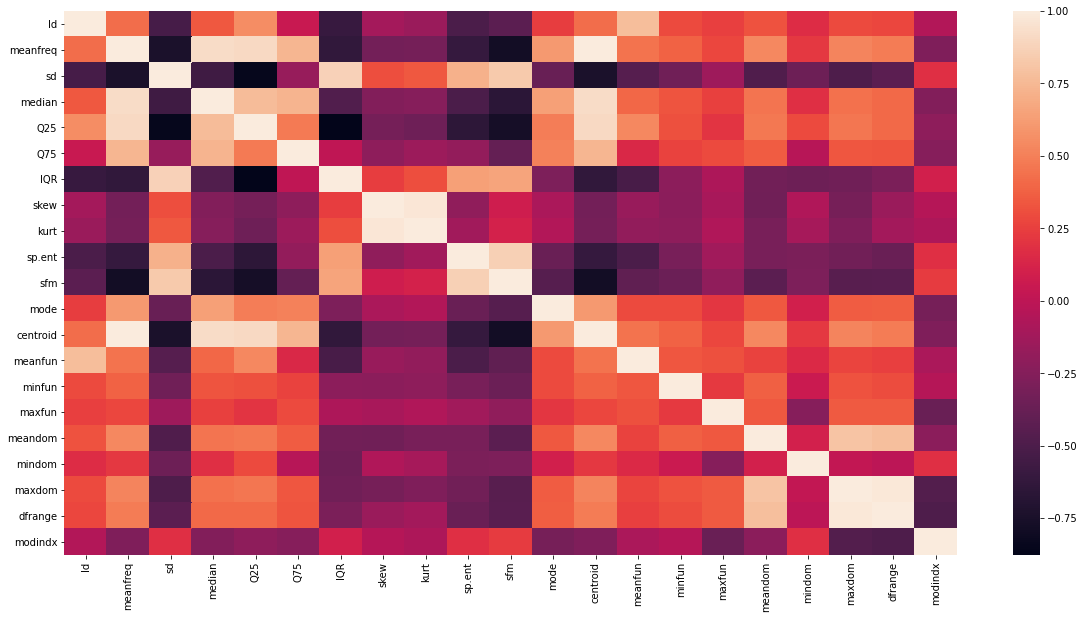

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr())
plt.show()

In [17]:
'''
observation:
From the above heatmap, it is easier to visualise the correlation. The pre-profiling data also gave a lot of insights
This would be helpful to eliminate some features while we proceed for modeling.
For example, features like meanfreq, Q25, Q75 has high positive and negative correlation with many features.
We can run the basic model and then eliminate based on the results
'''

'\nobservation:\nFrom the above heatmap, it is easier to visualise the correlation. The pre-profiling data also gave a lot of insights\nThis would be helpful to eliminate some features while we proceed for modeling.\nFor example, features like meanfreq, Q25, Q75 has high positive and negative correlation with many features.\nWe can run the basic model and then eliminate based on the results\n'

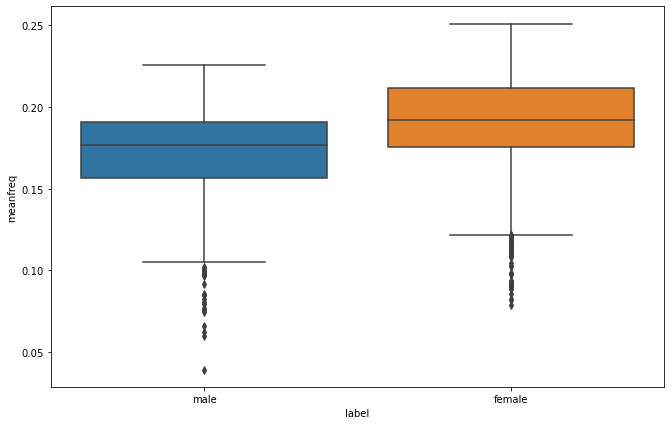

In [18]:
# distribution of meanfreq stratified with label
plt.figure(figsize=(11,7))
sns.boxplot(y='meanfreq', data=df_train, x='label')
plt.show()

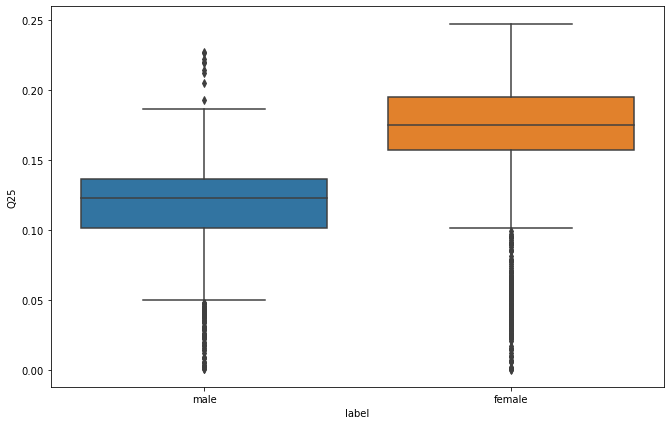

In [19]:
# distribution of Q25 stratified with label
plt.figure(figsize=(11,7))
sns.boxplot(y='Q25', data=df_train, x='label')
plt.show()

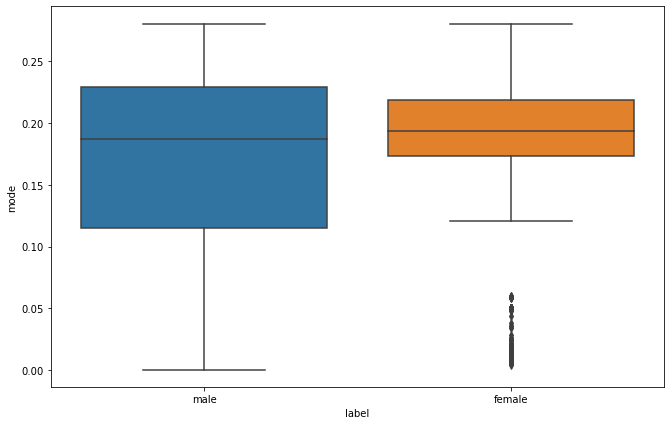

In [20]:
plt.figure(figsize=(11,7))
sns.boxplot(y='mode', data=df_train, x='label')
plt.show()

In [21]:
'''
Observation:
From the above 3 boxplots stratified by label, the median value for meanfreq and Q25 for female is higher compared to male.
For mode, the range for female is much small compared to male. 
'''

'\nObservation:\nFrom the above 3 boxplots stratified by label, the median value for meanfreq and Q25 for female is higher compared to male.\nFor mode, the range for female is much small compared to male. \n'

<a name = Section7></a>

---
# **7. Data Post-Processing**
---



# 7.1 Data Preparation

In [22]:
# Removing ID column as it is not required
df_train=df_train.drop(['Id'], axis=1)
df_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


In [23]:
# Splitting X and y for the model
X=df_train.drop(['label'], axis=1)
y=df_train.label
print(X.shape,y.shape)

(2851, 20) (2851,)


In [24]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2280, 20)
y_train shape:  (2280,)
X_test shape:  (571, 20)
y_test shape:  (571,)


# 7.2 Data Scaling

In [25]:
#All numeric data to be scaled before applying any algorithm.
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_scaled.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.146157,-0.598172,-0.276261,0.359263,-0.190183,-0.514318,-0.188832,-0.201764,-0.270397,-0.258796,-0.333704,0.146157,0.320262,0.644347,0.621737,0.913261,-0.454392,0.577767,0.569782,-0.168350
1,0.375758,-0.010371,0.518987,-0.158491,0.469267,0.439929,-0.431941,-0.236386,0.328131,-0.401871,0.306638,0.375758,-0.924632,0.633760,0.207320,-0.718540,-0.454392,-0.915081,-0.954279,-0.864998
2,-1.823063,1.155619,-2.121951,-1.576417,-1.855340,0.769801,0.171145,0.026818,1.474973,1.874765,-1.922703,-1.823063,-1.649377,-1.122282,0.409846,0.198806,-0.706835,-0.047042,-0.063535,0.752444
3,0.476700,-0.881223,0.268387,0.806788,-0.161832,-1.008352,-0.234835,-0.210734,-0.470283,-0.487227,0.167254,0.476700,0.995783,0.901141,0.307451,0.486500,2.196255,0.115854,0.050371,-0.523164
4,0.274498,-0.795976,-0.170683,0.533256,-0.877787,-1.092602,-0.150084,-0.198890,-0.583007,-0.789528,0.148238,0.274498,0.710908,0.566981,0.567851,0.777360,-0.454392,0.751821,0.747475,-0.856555


# 8. Model Development and Evaluation

In [26]:
'''
The label being categorical, we will use decisiontree classifier, Random forest classifer and naive bayes classifier to see the prediction 
results to start with.

'''

'\nThe label being categorical, we will use decisiontree classifier, Random forest classifer and naive bayes classifier to see the prediction \nresults to start with.\n\n'

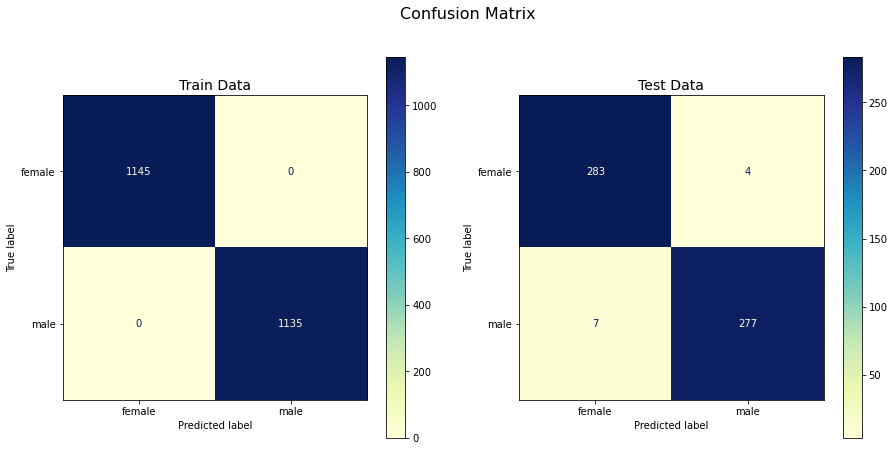

In [63]:
# Instantiate a random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

# Predicting on  testing labels
y_pred_train=rfc.predict(X_train_scaled)
y_pred_test =rfc.predict(X_test_scaled)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rfc, X=X_train_scaled, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rfc, X=X_test_scaled, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [28]:
'''
Observation:

From the confusion matix above, training data looks perfect.
On test data, Out of 284 True male category, 7 are predicted wrong (TN if we consider male as positive)
On 287 female, 4 are predicted as male(TP)
'''

'\nObservation:\n\nFrom the confusion matix above, training data looks perfect.\nOn test data, Out of 284 True male category, 7 are predicted wrong (TN if we consider male as positive)\nOn 287 female, 4 are predicted as male(TP)\n'

In [62]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      1145
        male       1.00      1.00      1.00      1135

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280

                    Testing Report           
              precision    recall  f1-score   support

      female       0.98      0.99      0.98       287
        male       0.99      0.98      0.98       284

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



In [30]:
'''
Observations:
As seen above, since the metric is F1 score, it is 1 for train data and 0.98 for test data. Lets see how the data performs on
other algorithm
'''

'\nObservations:\nAs seen above, since the metric is F1 score, it is 1 for train data and 0.98 for test data. Lets see how the data performs on\nother algorithm\n'

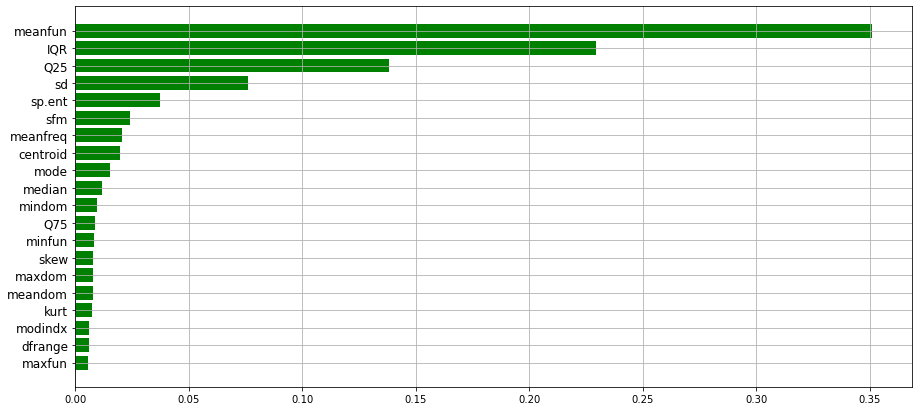

In [31]:
#Features importance of the various features
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()

In [ ]:
'''
Observation:
We can clearly see that Top 5 features are dominating compared to others. SInce, we have a test F1 score of 98%, there is no need to 
further reduce the dataset. Either we can reduce the dataset or do a PCA with 3 components.
'''

In [32]:
#Prediction using Decision tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

# Predicting on  testing labels
y_pred1_train=dtc.predict(X_train_scaled)
y_pred1_test = dtc.predict(X_test_scaled)

In [33]:
train1_report = classification_report(y_train, y_pred1_train)
test1_report = classification_report(y_test, y_pred1_test)
print('                    Training Report          ')
print(train1_report)
print('                    Testing Report           ')
print(test1_report)

                    Training Report          
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      1145
        male       1.00      1.00      1.00      1135

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280

                    Testing Report           
              precision    recall  f1-score   support

      female       0.97      0.96      0.96       287
        male       0.96      0.97      0.96       284

    accuracy                           0.96       571
   macro avg       0.96      0.96      0.96       571
weighted avg       0.96      0.96      0.96       571



In [34]:
#using naive bayes classifier
from sklearn.naive_bayes import GaussianNB 
naive = GaussianNB()
naive.fit(X_train_scaled, y_train)
# Predicting on  testing labels
y_pred2_train=naive.predict(X_train_scaled)
y_pred2_test = naive.predict(X_test_scaled)

In [39]:
train2_report = classification_report(y_train, y_pred2_train)
test2_report = classification_report(y_test, y_pred2_test)
print('                    Training Report          ')
print(train2_report)
print('                    Testing Report           ')
print(test2_report)

                    Training Report          
              precision    recall  f1-score   support

      female       0.91      0.89      0.90      1145
        male       0.89      0.91      0.90      1135

    accuracy                           0.90      2280
   macro avg       0.90      0.90      0.90      2280
weighted avg       0.90      0.90      0.90      2280

                    Testing Report           
              precision    recall  f1-score   support

      female       0.89      0.89      0.89       287
        male       0.89      0.89      0.89       284

    accuracy                           0.89       571
   macro avg       0.89      0.89      0.89       571
weighted avg       0.89      0.89      0.89       571



In [ ]:
'''
Observation:
Randomforest seems to work better as F1 score on test is 98%. Decision tree is at 96% and naive bayes at 89%
Let us summarise all of them in one code as shown below
'''

In [51]:
# Instantiating various classifiers and printing results in one go
from sklearn.metrics import classification_report
clfs = [RandomForestClassifier(random_state=42),DecisionTreeClassifier(),GaussianNB()]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train_scaled, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train_scaled)

  # Make predictions using test data
  y_pred = clf.predict(X_test_scaled)

  # Calculate the train accuracy of the model
  cl_train = classification_report(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  cl_test = classification_report(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train results]:', cl_train)
  print('[Test results]:', cl_test)
  print('----------------------------------------\n')

Performance Metric of RandomForestClassifier :
[Train results]:               precision    recall  f1-score   support

      female       1.00      1.00      1.00      1145
        male       1.00      1.00      1.00      1135

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280

[Test results]:               precision    recall  f1-score   support

      female       0.98      0.99      0.98       287
        male       0.99      0.98      0.98       284

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571

----------------------------------------

Performance Metric of DecisionTreeClassifier :
[Train results]:               precision    recall  f1-score   support

      female       1.00      1.00      1.00      1145
        male       1.00      1.00      1.00      11

In [ ]:
'''
Summary:
From the above iteration with 3 algorithm, Random forest seems to perform well with a train F1 score of 1 and test score of 0.98.
We will proceed with this and evaluate the unseen test data for submission.
'''

In [58]:
#verifying test data
df_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


In [60]:
#scaling the values with scaler used for training set
df_test_scaled=pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
print(df_test_scaled.head())
print(df_test_scaled.shape)

   meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.204288 -1.792309 -0.034614  0.693571 -0.835663 -1.251906 -0.109806   
1  0.273037  0.192361  0.276491 -0.044251  0.784475  0.484067 -0.390214   
2 -1.009507  1.812525 -0.312795 -1.450792  0.068824  1.690423 -0.122224   
3  0.097943 -0.998584 -0.084318  0.334256 -0.712194 -0.774410 -0.255379   
4  0.820026 -1.062864  0.700116  0.954955  0.188545 -0.983413 -0.244349   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0 -0.190087 -1.642183 -1.408050  0.030799  0.204288  0.923138 -0.711192   
1 -0.232460  0.312519 -0.194469 -0.621377  0.273037 -0.307309  0.758033   
2 -0.099933  1.648088  2.112781 -2.082630 -1.009507 -1.023301 -1.046094   
3 -0.213714  0.060712 -0.535882 -0.027596  0.097943  0.193116 -0.971536   
4 -0.213107 -0.433164 -0.773934  0.747456  0.820026  0.363546  0.557010   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.409846 -1.244641 -0.706835 -1

In [65]:
#predicting the label with randomforest classifier
pred_final=pd.DataFrame(rfc.predict(df_test_scaled))
pred_final
print(pred_final.shape)


,0
0,female
1,male
2,male
3,female
4,female
5,female
6,male
7,male
8,female
9,male


In [78]:
#reading the submission file
submission=pd.read_csv("sample_submission.csv", header=None)
submission.columns=['ID', 'Label']
submission=submission.drop(['Label'], axis=1)
#concating the results with the ID
sub=pd.concat([submission,pred_final],axis=1)
sub.columns=['ID','Label']
#saving the file for submission
sub.to_csv("submission.csv", index=False,header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

In [ ]:
'''
Summary:
1. The client is a telecom company and their client base is increasing day by day. (in millions)
2. They collected different aspects of the voice (acoustic prop) and they are created as a model with the label(female or male)
3. As a data scientist, raw data is studied and no missing data in this. In 3 features, zero value replced either with mean or median
4. Pre-profiling shared a detailed review of the data. Label is balanced with both female and male in almost equal numbers
5. This being a classification problem, Decisiontree,randomforest and naivebayes chosen for analysis
6. Model preparation done with train test split and scaling as we have numeric data with different scales
7. On running the three models, classification report made both for train and test data. F1 score is the metric to be seen
8. Random forest has the highest F1 score of 98%. Same chosen for predicting the label on unknown data
9. Prediction done and file stored in the prescribed format.
10. Project gave a good opportunity to study a new data, understand requirements, pre-profile, clean the data and then model as per 
    requirements. This gave a good experience and support client to quickly predict the voice with a very high F1 score

'''